In [1]:
pip install google-play-scraper

  Using cached google_play_scraper-1.2.7-py3-none-any.whl.metadata (50 kB)
Using cached google_play_scraper-1.2.7-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
# !pip install -q transformers
!pip install --upgrade transformers

In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
zed_app = reviews_all('ng.pawa.app',sleep_milliseconds=0, lang='en', sort=Sort.NEWEST)

In [5]:
zed_app

[{'reviewId': '9bcdbbcf-4b06-4ba0-af06-ebbd3a403852',
  'userName': 'Rose Linda',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIWIIUv4u3_eJQhaTjps41NM254jzjjGgK5ii1dioKMkbPHYw=mo',
  'content': 'Good',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '4.1.2',
  'at': datetime.datetime(2024, 12, 28, 22, 15, 46),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '4.1.2'},
 {'reviewId': '87621ecf-d460-41cc-80b4-46da93c3fbe9',
  'userName': 'Maduadigo Chinonso',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjX1qhEXC1F3ZOfV0Kh45l_EF6OjeMbsYTKTTwzdsfx7CzuRj_o',
  'content': 'Very Dull',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 12, 28, 20, 14, 16),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': 'd5718120-3ef9-41b6-adce-3a3ae38ffc6e',
  'userName': 'OLATUNJI MUSTAPHA TUNDE',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVKR-Xidv

In [6]:
# convert the json data into a dataframe
zed_app_df = pd.json_normalize(zed_app)

In [7]:
zed_app_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9bcdbbcf-4b06-4ba0-af06-ebbd3a403852,Rose Linda,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,4.1.2,2024-12-28 22:15:46,None,NaT,4.1.2
1,87621ecf-d460-41cc-80b4-46da93c3fbe9,Maduadigo Chinonso,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Dull,1,0,None,2024-12-28 20:14:16,None,NaT,None
2,d5718120-3ef9-41b6-adce-3a3ae38ffc6e,OLATUNJI MUSTAPHA TUNDE,https://play-lh.googleusercontent.com/a-/ALV-U...,The App is ok,4,0,2.4.6,2024-12-26 19:51:44,None,NaT,2.4.6
3,7b6e2db5-d41e-4a15-89cb-cfade9568891,Jama Stone,https://play-lh.googleusercontent.com/a/ACg8oc...,Sweet,5,0,4.1.2,2024-12-25 16:01:54,None,NaT,4.1.2
4,5bb66c36-8a2f-4ef3-a740-d56861360ddf,Uguw Tochukwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Awesome,5,0,4.1.2,2024-12-23 19:27:57,None,NaT,4.1.2


In [8]:
zed_app_df.shape

(1506, 11)

In [9]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "C:/Users/Muhammad Nasir/Desktop/DSFP/ETL"  # Directory to save the model

c:\Users\Muhammad Nasir\Desktop\DSFP\ETL\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [21]:
pip install tf_keras



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 430.4 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 430.4 kB/s eta 0:00:03
   ------------------ --------------------- 0.8/1.7 MB 486.4 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 486.4 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 518.8 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 518.8 kB/s eta 0:00:02
   ------------------------------ --------- 1.3/

In [23]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Very bad experience, I fund in order to create a dollar card,its keep saying creation failed for both visa and master, and now to send my money back, it's saying service is not available.. Very bad experience, run for your life if u want peace of mind, I'm not recommending the app for you")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9995124340057373}]


In [24]:
sentiment_analysis_reuse("Very Dull")

[{'label': 'NEGATIVE', 'score': 0.9994508624076843}]

In [25]:
#removing wildcharacter and cleaning the content column by casting to a str
zed_app_df['content_new']= zed_app_df['content'].astype('str')

In [26]:
zed_app_df['result'] =zed_app_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [27]:
# spliting the result into sentiment and score
zed_app_df['sentiment'] = zed_app_df['result'].apply(lambda x: (x[0]['label']))
zed_app_df['score'] = zed_app_df['result'].apply(lambda x: (x[0]['score']))

In [28]:
zed_app_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result,sentiment
0,9bcdbbcf-4b06-4ba0-af06-ebbd3a403852,Rose Linda,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,0.998415,0,4.1.2,2024-12-28 22:15:46,None,NaT,4.1.2,Good,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE
1,87621ecf-d460-41cc-80b4-46da93c3fbe9,Maduadigo Chinonso,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Dull,0.999451,0,None,2024-12-28 20:14:16,None,NaT,None,Very Dull,"[{'label': 'NEGATIVE', 'score': 0.999450862407...",NEGATIVE


In [35]:
pip install matplotlib


  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp310-cp310-win_amd64.whl.metadata (168 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Matplotlib is building the font cache; this may take a moment.


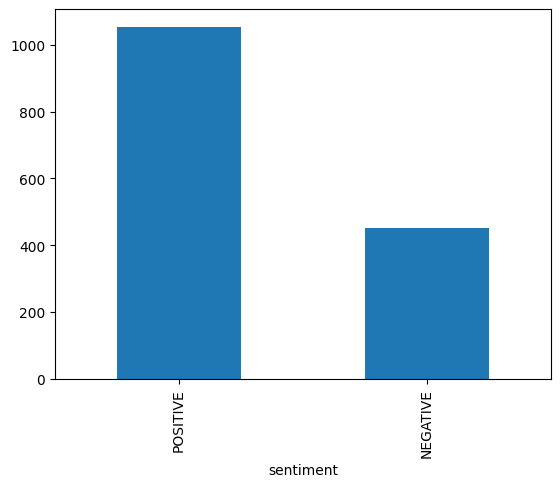

In [36]:
import matplotlib.pyplot as plt
zed_app_df['sentiment'].value_counts().plot(kind='bar');

In [37]:
file_name = 'zedApp_reviews.xlsx'
zed_app_df.to_excel(file_name, index=False)

In [38]:
pd.read_excel('zedApp_reviews.xlsx').head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result,sentiment
0,9bcdbbcf-4b06-4ba0-af06-ebbd3a403852,Rose Linda,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,0.998415,0,4.1.2,2024-12-28 22:15:46,NaN,NaT,4.1.2,Good,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE


In [16]:
# pip install mysql-connector-python --upgrade

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   -----------------

In [39]:
dataframe=zed_app_df

In [40]:
data = [tuple(row) for row in zed_app_df.to_numpy()]

In [41]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [42]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [43]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [44]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'port': 3306,
    'user': 'root',
    'password': '',
    'database': 'ZedApp_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "ZedApp_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'ZedApp_reviews' does not exist. Creating it...
Database 'ZedApp_reviews' created successfully!
Table `ZedApp_reviews` created successfully!
1506 rows inserted/updated successfully!
MySQL connection closed.
